<a href="https://colab.research.google.com/github/joew2k/finance_data/blob/main/Group_Work_Project_2_DERIVATIVE_PRICING_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### using Monte-Carlo methods under a general GBM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



$$S_{T} = S_{t} e^{\left(\left(r-\frac{1}{2}\sigma^{2}\right)(T-t) +\sigma \sqrt{T-t}\,z\right)}\,,$$


In [ ]:

def gbm_mc_option_price(S0, K, r, sigma, t, T, ite, opttype):
  np.random.seed(42)
  data = np.zeros([ite, 2])
  z = np.random.normal(0, 1, [1, ite])
  ST = S0 * np.exp(
      (r - 0.5 * sigma**2) * (T - t) + sigma * np.sqrt(T - t) * z
  )
  if opttype == "C":
    data[:, 1] = ST - K
  elif opttype =="P":
    data[:, 1] = K - ST
  else:
    ValueError("Unknown option type provided, chose C or P")
  average = np.sum(np.amax(data, axis=1))/float(ite)

  return np.exp(-r * (T -t)) * average, ST

def delta_mc(S0, K, r, sigma, t, T, ite, opttype):
  price, S =  gbm_mc_option_price(S0, K, r, sigma, t, T, ite, opttype)
  S1 = S[:, 0][0]

  # calculate new call price
  price2, ST = gbm_mc_option_price(S1, K, r, sigma, t, T, ite, opttype)

  delta = (price2 - price)/(int(S1) - S0)

  return delta

def vega_mc(S0, K, r, sigma, t, T, ite, opttype, dsigma):
  price, S =  gbm_mc_option_price(S0, K, r, sigma, t, T, ite, opttype)

  # calculate new call price
  price2, S2 = gbm_mc_option_price(S0, K, r, dsigma, t, T, ite, opttype)

  price_change = price2 - price

  vega = (price2 - price)/(dsigma - sigma)


  return vega, price_change


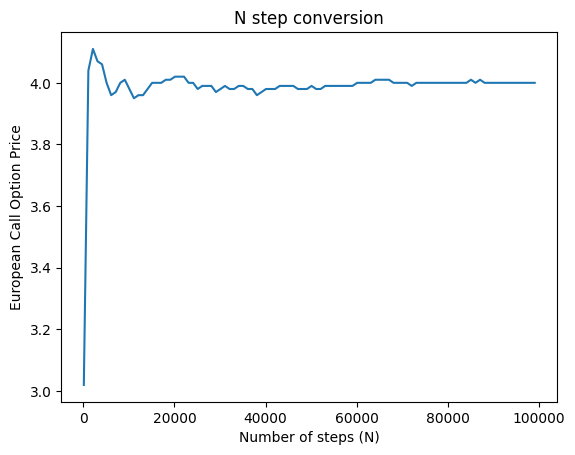

In [ ]:
price_list = []
Ite_Steps = [i for i in range(100, 100000, 1000)]
for i in range(100, 100000, 1000):
  price, S = gbm_mc_option_price(100, 100, 0, 0.20, 0, 3/12, i, "C")
  # print({"European ATM call option price at {} steps".format(i):np.round(price, 3)})
  price_list.append(np.round(price, 2))
plt.plot(Ite_Steps, np.array(price_list))
plt.title("N step conversion")
plt.xlabel("Number of steps (N)")
plt.ylabel("European Call Option Price")
plt.show()

In [ ]:
price, S = gbm_mc_option_price(100, 100, 0, 0.20, 0, 3/12, 60000, "C")
print("The price after 60000 itration for the European call option using monte carlo simulation is ${} ".format(np.round(price, 2)))

The price after 60000 itration for the European call option using monte carlo simulation is $3.99 


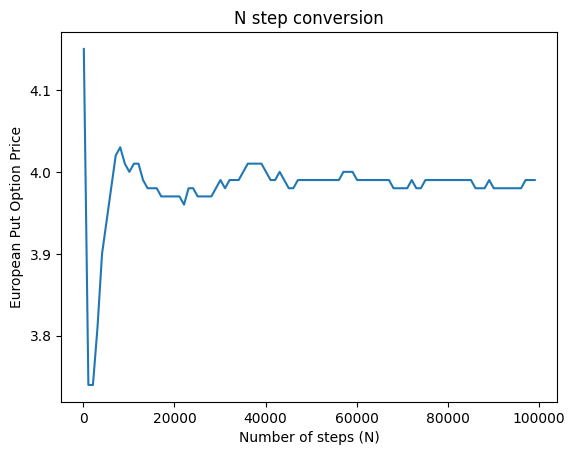

In [ ]:

price_list = []
Ite_Steps = [i for i in range(100, 100000, 1000)]
for i in range(100, 100000, 1000):
  price, S = gbm_mc_option_price(100, 100, 0, 0.20, 0, 3/12, i, "P")
  # print({"European ATM call option price at {} steps".format(i):np.round(price, 3)})
  price_list.append(np.round(price, 2))
plt.plot(Ite_Steps, np.array(price_list))
plt.title("N step conversion")
plt.xlabel("Number of steps (N)")
plt.ylabel("European Put Option Price")
plt.show()

In [ ]:
price, S = gbm_mc_option_price(100, 100, 0, 0.20, 0, 3/12, 60000, "P")
print("The price of the put option after 60000 itration for the European option using monte carlo simulation is ${} ".format(np.round(price, 2)))

The price of the put option after 60000 itration for the European option using monte carlo simulation is $3.99 


## 5a

From the graph above, we can see that the price of the option becomes stable at 60000 iterations steps

## 5b

The Monte Carlo simulation was iterated from 100 to 100000 steps, clearly from the graph above the price becomes stable at 60000 iteration for both the call and put option.

In [ ]:
call_delta = delta_mc(100, 100, 0, 0.20, 0, 3/12, 60000, "C")
put_delta = delta_mc(100, 100, 0, 0.20, 0, 3/12, 60000, "P")

print({"Option Delta":[{"call delta": call_delta, "put delta": put_delta}]})

{'Option Delta': [{'call delta': 0.6942610750869099, 'put delta': -0.44785472349463173}]}


## 6a
Again, The Call Delta is positive and the Put Delta is negative. This means that the call option's price increases when the underlying asset's price increases, and vice versa. The put option's price decreases when the underlying asset's price increases, and vice versa.

The Delta of an option measures the sensitivity of the option's price to changes in the underlying asset's price. It can be interpreted as the approximate change in the option's price for a small change in the underlying asset's price, holding other factors constant.

## 6b
It makes sense to obtain a positive Delta for a call option because a call option gives the holder the right to buy the underlying asset at a fixed strike price. Therefore, when the underlying asset's price increases, the call option becomes more valuable as it allows the holder to buy the asset at a lower price than the market price.

It makes sense to obtain a negative Delta for a put option because a put option gives the holder the right to sell the underlying asset at a fixed strike price. Therefore, when the underlying asset's price decreases, the put option becomes more valuable as it allows the holder to sell the asset at a higher price than the market price.

In [ ]:
call_vega, call_price = vega_mc(100, 100, 0, 0.20, 0, 3/12, 60000, "C", 0.25)
put_vega, put_price = vega_mc(100, 100, 0, 0.20, 0, 3/12, 60000, "P", 0.25)
print({"Option Delta":[{"call vega": {"vega":call_vega, "price change":call_price}, "put vega": {"vega":put_vega, "price change":put_price }}]})

{'Option Delta': [{'call vega': {'vega': 19.947970093293904, 'price change': 0.9973985046646949}, 'put vega': {'vega': 19.935588863225608, 'price change': 0.9967794431612802}}]}


## 7a
Using the above we can say that due to 5% change in the volatilty of the undrlying asset, the price of the call option will change approximately $0.9973 and \$9967 for put option

## 7b

From the value of the vega returned we can say that the price of the option is highly sensitive to changes in implied volatilty. This means that the small changes in volatilty can lead to significant changes in both the call and put prices.

## Step 2
Team member B will use Monte-Carlo methods with regular GBM process and
daily simulations on an American Put option. Remember to answer the different
questions in the original GWP#1: price (Q5), calculate delta (Q6) and vega (Q7)
only for the Put option case.

In [ ]:
def american_option_price_mc(S, K, T, r, sigma, opttype, num_paths):
    """
    Returns:
    float: Price of the American option
    """
    np.random.seed(42)
    dt = T
    if T > 1:
        dt = 1 / 252  # assuming 252 trading days in a year

    paths = S * np.exp(np.cumsum((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.normal(0, 1, size=(num_paths, int(T / dt))), axis=1))


    # Calculate option payoffs
    if opttype == 'call':
        payoffs = np.maximum(paths - K, 0)
    elif opttype == 'put':
        payoffs = np.maximum(K - paths, 0)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    # Initialize continuation values as the payoffs
    continuation_values = payoffs.copy()

    # Perform LSM algorithm
    for t in range(int(T / dt) - 2, -1, -1):
        regression = np.polyfit(paths[:, t], continuation_values[:, t+1] * np.exp(-r * dt), 2)
        continuation_values[:, t] = np.maximum(payoffs[:, t], np.polyval(regression, paths[:, t]))

    # Calculate option price as the average of the discounted payoffs
    option_price = np.exp(-r * dt) * np.mean(np.maximum(payoffs[:, 0], continuation_values[:, 0]))

    return option_price


def delta_mc(S0, K, r, sigma, t, T, ite, opttype):
  price, S =  american_option_price_mc(S0, K, T, r, sigma, opttype, ite)
  S1 = S[:, 0][0]

  # calculate new call price
  price2, ST = american_option_price_mc(S0, K, T, r, sigma, opttype, ite)

  delta = (price2 - price)/(int(S1) - S0)

  return delta


def vega_mc(S0, K, r, sigma, t, T, ite, opttype, dsigma):
  price, S =  american_option_price_mc(S0, K, T, r, sigma, opttype, ite)

  # calculate new call price
  price2, S2 = american_option_price_mc(S0, K, T, r, sigma, opttype, ite)

  price_change = price2 - price

  vega = (price2 - price)/(dsigma - sigma)


  return vega, price_change

# # Input parameters
# current_price = 100
# strike_price = 100
# time_to_maturity = 1  # 1 year
# risk_free_rate = 0.05
# volatility = 0.2
# num_paths = 1700

# # Calculate the American Call option price using Monte Carlo simulation
# american_call_option_price = american_option_price_mc(current_price, strike_price, time_to_maturity, risk_free_rate, volatility, option_type='call')

# print(f"The price of the American Call option using Monte Carlo simulation is: {american_call_option_price:.2f}")


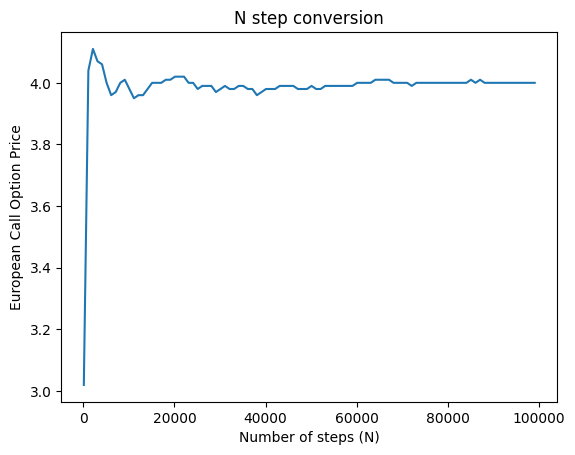

In [ ]:
price_list = []
Ite_Steps = [i for i in range(100, 100000, 1000)]
for i in range(100, 100000, 1000):
  price = american_option_price_mc(100, 100, 3/12, 0, 0.20, "call", i )
  # print({"European ATM call option price at {} steps".format(i):np.round(price, 3)})
  price_list.append(np.round(price, 2))
plt.plot(Ite_Steps, np.array(price_list))
plt.title("N step conversion")
plt.xlabel("Number of steps (N)")
plt.ylabel("European Call Option Price")
plt.show()

In [ ]:
price = american_option_price_mc(100, 100, 3/12, 0, 0.20, "call", 60000 )
print("The price of the put option after 60000 itration for the American call option using monte carlo simulation is ${} ".format(np.round(price, 2)))

The price of the put option after 60000 itration for the American call option using monte carlo simulation is $3.99 


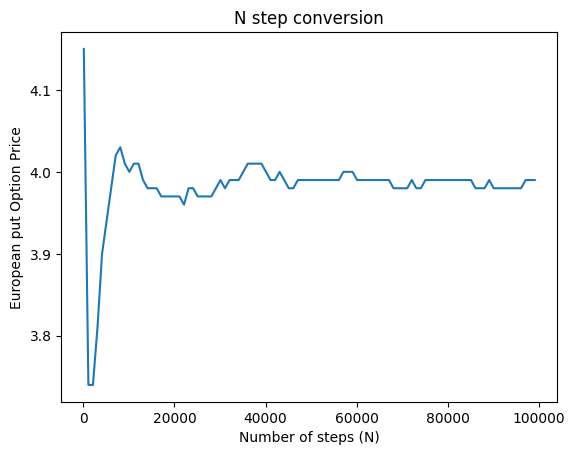

In [ ]:
price_list = []
Ite_Steps = [i for i in range(100, 100000, 1000)]
for i in range(100, 100000, 1000):
  price = american_option_price_mc(100, 100, 3/12, 0, 0.20, "put", i )
  # print({"European ATM call option price at {} steps".format(i):np.round(price, 3)})
  price_list.append(np.round(price, 2))
plt.plot(Ite_Steps, np.array(price_list))
plt.title("N step conversion")
plt.xlabel("Number of steps (N)")
plt.ylabel("European put Option Price")
plt.show()

In [ ]:
price = american_option_price_mc(100, 100, 3/12, 0, 0.20, "put", 60000 )
print("The price of the put option after 60000 itration for the American call option using monte carlo simulation is ${} ".format(np.round(price, 2)))

The price of the put option after 60000 itration for the American call option using monte carlo simulation is $3.99 


## 8
In pricing complex or exotic path dependent options, a popular is the barirrier option, These are standard European option expitation style otpton, however the option cease to exist or only comes into existance if the underlying price crosses a pretermined barrier level. This barrier level can either be continous or discrete barrier monitoring $T$

For an up-and-out barrier call option: $C_T = f(S_T) = (K - S_T)^+Ind(max S_t < H)_{t\in \tau}$

In other words for all simulations $m \in M:$

- if $t \in \tau $ and $S_t \geq H$ then $C_T = 0$
- else if $t \notin \tau$ and $S_t < H$ then $C_T = (S_T - K)^+$

In [ ]:
# Initial Parameter
S0 = 120  # Initial stock price
K = 120   # Strike price
T = 8/12     # time to maturity in years
H = 141   # up and out barrier price/value
r = 0.06  # annual risk-free rate
vol = 0.3   # volatility (%)
N = 173   # number of time steps
M = 1000  # number of simulations

In [ ]:
dt = T/N  # Change in time
nudt = (r - 0.5*vol**2) *dt # deterministic component
volsdt = vol * np.sqrt(dt)  # difusion component
erdt = np.exp(r * dt) # discounting factor

# Standard error place holders
sum_CT = 0
sum_CT2 = 0

# Monte carlo

for i in range(M):

  # barrier crossed flag
  BARRIER = False
  St = S0

  for j in range(N):
    epsilon  = np.random.normal()
    Stn = St * np.exp(nudt + volsdt * epsilon)
    St = Stn
    if St >= H:
      BARRIER = True
      break

  if BARRIER:
    CT = 0
  else:
    CT = max(0, K - St)

  sum_CT = sum_CT + CT
  sum_CT2 = sum_CT2 + CT * CT
# Compute Expectations and SE
C0 = np.exp(-r * T) * sum_CT/M
sigma = np.sqrt((sum_CT2 - sum_CT * sum_CT/M) * np.exp(-2 * r * T )/ (M - 1))
SE = sigma/np.sqrt(M)
print("Call value is ${0} with SE +/- {1}".format(np.round(C0, 2), np.round(SE, 2)))

Call value is $8.58 with SE +/- 0.42
